In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('D:/Data Science/Assignment/13KNN/Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data['animal name'].value_counts()

frog        2
seawasp     1
raccoon     1
ostrich     1
tortoise    1
           ..
platypus    1
clam        1
catfish     1
herring     1
lion        1
Name: animal name, Length: 100, dtype: int64

In [4]:
#split the data
x = data.iloc[:,1:17]
y= data.iloc[:,17]
x.shape,y.shape

((101, 16), (101,))

In [5]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
#use KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)

In [7]:
#accuracy
np.mean(pred==y_test)

0.9523809523809523

In [8]:
#Matrics Evaluation
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[8, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [9]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.94      0.97      0.95        21
weighted avg       0.97      0.95      0.95        21



In [10]:
error_rate=[]
for i in range(1,40):
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.05, 0.1, 0.14, 0.19, 0.14, 0.19, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.29, 0.38, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48]


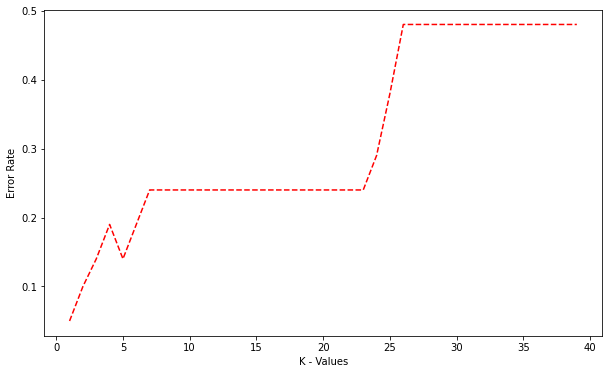

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',markerfacecolor='red',markersize=10)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.show()

In [12]:
# k = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)
print('accuracy =',np.mean(pred==y_test))

print(confusion_matrix(y_test,pred))

print(classification_report(pred,y_test))

accuracy = 0.9523809523809523
[[8 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 1 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.94      0.97      0.95        21
weighted avg       0.97      0.95      0.95        21



In [13]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid=dict(n_neighbors=range(1,40))
knn_models=KNeighborsClassifier()
grid= GridSearchCV(estimator=knn_models,param_grid=param_grid)
grid.fit(x,y)
print(grid.best_score_)
grid.best_params_

0.97


{'n_neighbors': 1}

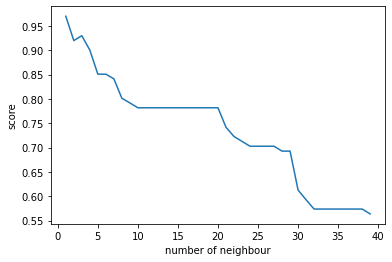

0.97


In [14]:
# kfold cross validation
from sklearn.model_selection import cross_val_score
k_score=[]
for i in range(1,40):
    knn_models = KNeighborsClassifier(n_neighbors=i)
    scores= cross_val_score(knn_models,x,y)
    k_score.append(scores.mean())

plt.plot(range(1,40),k_score)
plt.xlabel("number of neighbour")
plt.ylabel("score")
plt.show()
print(max(k_score))

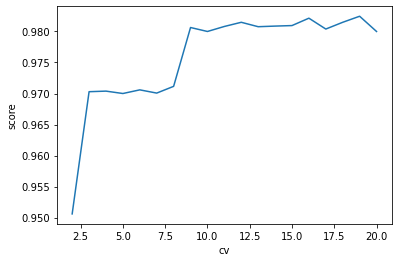

0.9824561403508772


In [15]:
#find Crosss validation
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 1)
    scores = cross_val_score(knn, x, y, cv=k)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))

In [17]:
model_1 =KNeighborsClassifier(n_neighbors=1) 
result = cross_val_score(model_1,x,y,cv=19)
print("accuracy at k=1 and cv=19 is =",result.mean())

accuracy at k=1 and cv=19 is = 0.9824561403508772


In [19]:
model_2 = KNeighborsClassifier(n_neighbors=3)
result = cross_val_score(model_2,x,y,cv=19)
print("accuracy at k=3 and cv=19 is = ",result.mean())

accuracy at k=3 and cv=19 is =  0.9561403508771931


In [33]:
#create model using train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
model = KNeighborsClassifier(1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [34]:
print(np.mean(y_pred==y_test))
pd.crosstab(y_pred,y_test)

0.967741935483871


type,1,2,4,5,6,7
row_0,,,,,,
1,12,0,0,0,0,0
2,0,5,0,0,0,0
3,0,0,0,1,0,0
4,0,0,4,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,5,0
7,0,0,0,0,0,3


In [36]:
#gridsearch
clf=GridSearchCV(estimator=model,param_grid=param_grid)
clf.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': range(1, 40)})

In [39]:
grid.best_score_

0.97

In [38]:
grid.best_params_

{'n_neighbors': 1}

In [40]:

pred = clf.predict(x_test)
pd.crosstab(y_test,pred)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,12,0,0,0,0,0,0
2,0,5,0,0,0,0,0
4,0,0,0,4,0,0,0
5,0,0,1,0,1,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,0,3


In [41]:
np.mean(y_test==pred)

0.967741935483871

In [42]:
#model validation
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
models = [model, model_1, model_2]
std_score = []
accuracy = []
for i in models :
    res = cross_val_score(i, x, y, cv=loocv)
    std_score.append(res.std()*100)
    accuracy.append(res.mean()*100)
print(std_score)
print(accuracy)

[13.931927999475535, 13.931927999475535, 21.691982475452125]
[98.01980198019803, 98.01980198019803, 95.04950495049505]


In [46]:
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)
np.mean(y_pred_1 == y_test)

0.967741935483871

In [47]:
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
np.mean(y_pred_2 == y_test)    

0.9354838709677419

From above calculation we can conclude that model_2 has high standard deviation which leads to model failure. 
model {k = 1} using train_test_split validation technique and 
model_1{k=1 and cv=19}gives us high accuracy.
where as model_2 {k=3 and cv = 19 }is good model.